In [ ]:
f = open("../dat/parsed_books/mml-book.txt", "r")
raw_text = f.read()

## String search as a baseline
Maybe a simple string search can reveal the distribution of concepts.

In [7]:
import re
positions_le = [m.start() for m in re.finditer('linear equation', raw_text)]
positions_lr = [m.start() for m in re.finditer('linear regression', raw_text)]

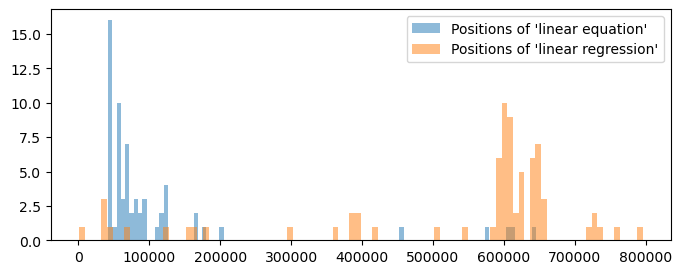

In [11]:
from matplotlib import pyplot as plt
plt.figure(figsize=(8,3))
plt.hist(positions_le, bins=100, alpha=0.5, label="Positions of 'linear equation'")
plt.hist(positions_lr, bins=100, alpha=0.5, label="Positions of 'linear regression'")
plt.legend()
plt.show()

Even though linear regression is mentioned first, it looks like linear equation might be an easier concept because it its center of weight is much earlier in the book than linear regression. This suggests taking median/mean instead of first occurence.